# Runtime => Change Runtime Type ==> T4 GPU

In [1]:
!pip install joblib

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Perfom data ingestion

In [3]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [4]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
df.shape

(9568, 5)

# You are working as a data scientist at a thermal power plant, Your goal is to estimate the power output of the plant (PE)

# Features : -
1. AT - Atmospheric Temperature in degree celsius
2. V - Vacuum pressure in Pascals
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in percentage
5. PE (Target) - Power output of plant in Mega Watt

# Step 2 - Perform data quality checks

In [6]:
df.shape

(9568, 5)

In [7]:
df.duplicated().sum()

np.int64(41)

In [8]:
# Remove duplicates from dataset
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [9]:
# Check missing values in dataframe
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


<Axes: xlabel='PE', ylabel='Count'>

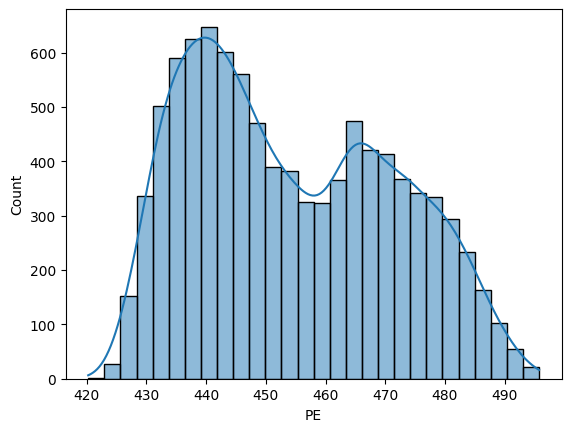

In [10]:
import seaborn as sns
sns.histplot(data=df, x="PE", kde=True)

# Step 3 - Seperate X and Y (PE)

In [11]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [15]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [16]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [17]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [18]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

# Step 5 - Apply preprocessing on X

In [21]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [23]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [24]:
num_pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [25]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [26]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 6 - Build the neural network

In [27]:
xtrain_pre.shape

(7621, 4)

In [28]:
xtrain_pre.shape[1]

4

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [30]:
model = Sequential(
    layers = [
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [33]:
hist = model.fit(xtrain_pre, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 205884.1719 - mae: 453.4393 - val_loss: 202413.8125 - val_mae: 449.5846
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 201097.3125 - mae: 448.1104 - val_loss: 189587.8281 - val_mae: 434.9896
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185204.6094 - mae: 429.7974 - val_loss: 161071.3281 - val_mae: 400.1388
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 154093.4844 - mae: 390.8058 - val_loss: 119763.2188 - val_mae: 341.6956
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112514.7031 - mae: 329.6678 - val_loss: 77587.3750 - val_mae: 265.3543
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71196.4688 - mae: 251.9786 - val_loss: 46862.5977 - val_mae: 196.6745
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 43530.9141 - mae: 189.1264 - val_loss: 29610.0039 - val_mae: 151.8149
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28046.9238 - 

# Plot the learning curve

In [34]:
hist.history["loss"]

[205425.15625,
 198298.9375,
 178480.109375,
 143929.296875,
 101664.96875,
 64179.68359375,
 39299.24609375,
 25545.7578125,
 18361.70703125,
 14466.109375,
 11901.64453125,
 9681.173828125,
 7675.0078125,
 5971.9736328125,
 4598.1826171875,
 3533.485595703125,
 2726.84326171875,
 2134.8837890625,
 1704.281494140625,
 1390.078369140625,
 1157.1256103515625,
 978.8606567382812,
 839.3709716796875,
 727.8189697265625,
 633.3216552734375,
 553.5224609375,
 487.785400390625,
 431.77301025390625,
 384.6134033203125,
 342.08441162109375,
 304.3437194824219,
 272.5509033203125,
 242.953857421875,
 216.4263916015625,
 192.97442626953125,
 171.77032470703125,
 152.46240234375,
 135.42352294921875,
 120.06700897216797,
 107.27713775634766,
 96.06423950195312,
 85.98002624511719,
 77.56488800048828,
 70.06501007080078,
 63.74345397949219,
 58.05606460571289,
 53.185096740722656,
 48.73065948486328,
 45.05893325805664,
 42.05097961425781,
 38.979347229003906,
 36.410240173339844,
 34.230022430419

In [35]:
hist.history["val_loss"]

[202413.8125,
 189587.828125,
 161071.328125,
 119763.21875,
 77587.375,
 46862.59765625,
 29610.00390625,
 20755.451171875,
 16114.921875,
 13297.1083984375,
 11027.76953125,
 8893.9736328125,
 7017.98291015625,
 5468.46337890625,
 4233.35986328125,
 3285.9482421875,
 2574.689208984375,
 2045.70263671875,
 1650.99560546875,
 1364.977783203125,
 1148.19970703125,
 980.9483642578125,
 843.5224609375,
 733.3519897460938,
 635.41748046875,
 560.5302124023438,
 493.73529052734375,
 441.8086853027344,
 391.5795593261719,
 348.6572265625,
 315.825927734375,
 280.4624938964844,
 250.41905212402344,
 223.82052612304688,
 200.85140991210938,
 179.3044891357422,
 160.2628631591797,
 143.8503875732422,
 130.34690856933594,
 115.94865417480469,
 104.74479675292969,
 93.47030639648438,
 84.32624053955078,
 75.81924438476562,
 68.83189392089844,
 63.2137336730957,
 56.693729400634766,
 51.78853988647461,
 47.17426681518555,
 43.98469161987305,
 40.04751205444336,
 37.25741958618164,
 35.340469360351

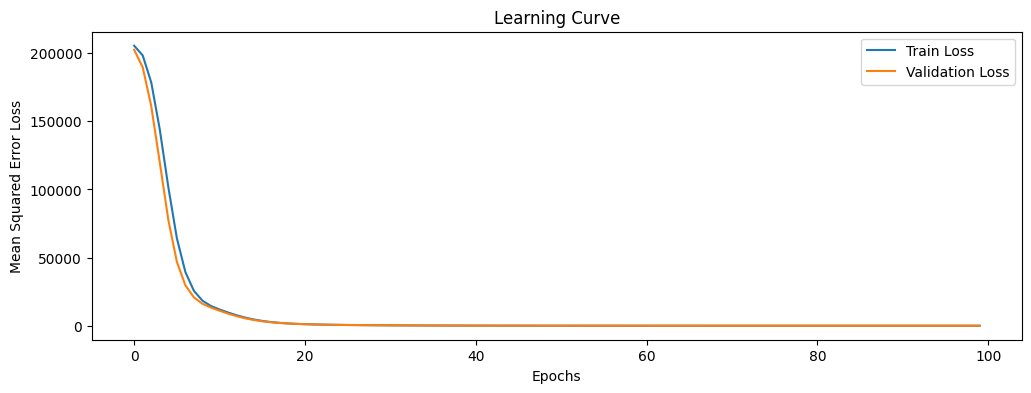

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# From above graph it is clear that the model is not overfitting


# Step 7 - Model evaluation

In [37]:
import math
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
train_rmse = math.sqrt(train_mse)
print(f"Training RMSE : {train_rmse:.2f}")
print(f"Training MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.2378 - mae: 3.5083
Training RMSE : 4.52
Training MAE : 3.51


In [38]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
test_rmse = math.sqrt(test_mse)
print(f"Testing RMSE : {test_rmse:.2f}")
print(f"Testing MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.3953 - mae: 3.3873
Testing RMSE : 4.49
Testing MAE : 3.52


In [39]:
ypred_train = model.predict(xtrain_pre)
ypred_train[0:5]

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[452.5178 ],
       [480.57047],
       [470.05194],
       [434.03384],
       [468.63565]], dtype=float32)

In [40]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [41]:
ypred_test = model.predict(xtest_pre)
ypred_test[0:5]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[431.9085 ],
       [482.95538],
       [484.28677],
       [450.10126],
       [447.87012]], dtype=float32)

In [42]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [43]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
  # Predict results on x
  ypred = model.predict(x)
  # Calculate the metrics
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  # Print the results
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [44]:
evaluate_model(model, xtrain_pre, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE : 4.52
MAE : 3.51
MAPE : 0.77%
R2 : 92.89%


In [45]:
evaluate_model(model, xtest_pre, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE : 4.49
MAE : 3.52
MAPE : 0.78%
R2 : 93.33%


# Above results say that it is a good model becasue R2 score > 0.8 both in train and test

In [46]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [47]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [48]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [49]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [50]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[445.04712],
       [437.65292],
       [430.47244],
       [438.78848],
       [475.76794]], dtype=float32)

# Save above predictions in dataframe

In [51]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.049988
1,28.88,54.89,1007.16,46.60,437.649994
2,27.89,73.21,1001.32,85.88,430.470001
3,25.69,62.26,1011.38,74.08,438.790009
4,12.16,40.81,1025.79,70.97,475.769989
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.480011
96,11.78,39.96,1011.37,82.95,473.420013
97,5.62,41.38,1020.91,86.21,487.089996
98,24.96,74.99,1008.25,80.52,438.559998


<Axes: xlabel='PE_pred', ylabel='Count'>

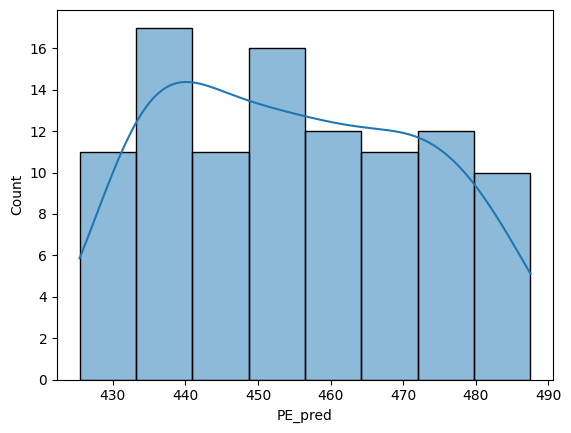

In [52]:
sns.histplot(data=xnew, x="PE_pred", kde=True)

In [53]:
xnew.to_csv("results.csv", index=False)

# Save the model objects

In [54]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [55]:
import joblib
joblib.dump(num_pipe, "plant_pre.joblib")

['plant_pre.joblib']

In [56]:
# Save the neural network
model.save("plant_model.keras")

# Loading the pre and keras model

In [57]:
p = joblib.load("plant_pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [58]:
from keras.models import load_model

m = load_model("plant_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)